In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Data Loading

In [223]:
dfs = []
first_day = []
last_day = []

for i in range(16, 25):
    # za prvi dan
    if i == 11:
        df = pd.read_csv('../GB_Datasets/19.{}.12_GB_videos.csv'.format(i))
        first_day = df['video_id']
    
    # za poslednji dan, svuda ce trebati lepsa logika
    if i == 24:
        df = pd.read_csv('../GB_Datasets/19.{}.12_GB_videos.csv'.format(i))
        last_day = df['video_id']
    
    if i != 15 and i != 11 and i != 24:
        df = pd.read_csv('../GB_Datasets/19.{}.12_GB_videos.csv'.format(i))
        dfs.append(df)
        

In [224]:
dfs[0]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,h1JKzHPCGso,Sidemen - Merry Merry Christmas Ft. Jme & LayZ...,2019-12-15T19:46:17.000Z,UCh5mLn90vUaB1PbRRx_AiaA,MoreSidemen,10,19.16.12,sidemen|official music video|sidemen merry mer...,2546508,275342,9013,10393,https://i.ytimg.com/vi/h1JKzHPCGso/default.jpg,False,False,Whoever has the most views on their Sidemen Of...
1,a_TSR_v07m0,Porch Pirate vs. Glitter Bomb Trap 2.0,2019-12-15T17:00:01.000Z,UCY1kMZp36IQSyNx_9h4mpCg,Mark Rober,28,19.16.12,package thief|glitter bomb|porch pirate|glitte...,8768327,664868,7420,31059,https://i.ytimg.com/vi/a_TSR_v07m0/default.jpg,False,False,11 months of social justice engineering boiled...
2,HayzAN99uSE,Arsenal 0-3 Man City | What Are The Kroenke's ...,2019-12-15T19:19:43.000Z,UCBTy8j2cPy6zw68godcE7MQ,AFTV,17,19.16.12,a.f.c.|afc|aftv|arsenal|arsenal fan tv|arsenal...,569840,12430,603,2859,https://i.ytimg.com/vi/HayzAN99uSE/default.jpg,False,False,SUBSCRIBE NOW : https://goo.gl/Zq9NcAAFTV SHOP...
3,YDqqbH2MlGg,"Champions League Round of 16 Draw | Liverpool,...",2019-12-16T11:54:40.000Z,UC4i_9WvfPRTuRWEaWyfKuFw,BT Sport,17,19.16.12,bt sport|bt sport official|football|soccer|spo...,129681,1913,84,230,https://i.ytimg.com/vi/YDqqbH2MlGg/default.jpg,False,False,Watch the draw for the UEFA Champions League l...
4,a9m3GD0DbPY,Baking A Wedding Cake With Every Possible Cake...,2019-12-15T21:21:11.000Z,UCbAwSkqJ1W_Eg7wr3cp5BUA,Safiya Nygaard,22,19.16.12,baking a wedding cake with every possible cake...,2028770,156037,1890,9962,https://i.ytimg.com/vi/a9m3GD0DbPY/default.jpg,False,False,"And now I present to you, part 2 of our 4-part..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,X2m-08cOAbc,Free Guy | Official Trailer | 20th Century FOX,2019-12-07T18:32:52.000Z,UC2-BeLxzUBSs0uSrmzWhJuQ,20th Century Fox,1,19.16.12,Free Guy|Ryan Reynolds|Trailer|Jodie Comer|Tai...,9929560,264889,8799,15302,https://i.ytimg.com/vi/X2m-08cOAbc/default.jpg,False,False,In Twentieth Century Fox’s epic adventure-come...
196,KHsMUXSVl6g,Wonder Woman 1984 Trailer REACTION,2019-12-08T21:42:52.000Z,UCAXR2zenCwvRIyQd9ydtfaA,Beyond The Trailer,24,19.16.12,Wonder Woman 1984 Trailer|Wonder Woman 1984 Tr...,300489,12260,573,2276,https://i.ytimg.com/vi/KHsMUXSVl6g/default.jpg,False,False,Wonder Woman 1984 Trailer REACTION today! Beyo...
197,zuzg5LRMaGU,REACTION | Steven Gerrard | Rangers 0-1 Celtic,2019-12-08T17:42:08.000Z,UCVaGyBPoEAZItDjlFPsRcSA,Rangers Football Club (Official),17,19.16.12,Rangers|Rangers FC|Rangers Football Club|Range...,66852,0,0,467,https://i.ytimg.com/vi/zuzg5LRMaGU/default.jpg,False,True,The manager's verdict after defeat at Hampden....
198,wBbM7kOLOTM,Anthony Joshua beats Andy Ruiz Jr to reclaim w...,2019-12-08T10:42:39.000Z,UCoMdktPbSTixAyNGwb-UYkQ,Sky News,25,19.16.12,anthony joshua|andy|ruiz|jr|joshua|andy ruiz|s...,603613,2747,302,694,https://i.ytimg.com/vi/wBbM7kOLOTM/default.jpg,False,False,Anthony Joshua has beaten Andy Ruiz Jr in thei...


In [225]:
class YTVideo:
    def __init__(self, df_row, days_in_trending=1):
        self.video_id = df_row.video_id
        self.title = df_row.title
        self.published_at = df_row.publishedAt
        self.channel_id = df_row.channelId
        self.channel_title = df_row.channelTitle
        self.category_id = df_row.categoryId
        self.trending_date = df_row.trending_date
        self.tags = df_row.tags
        self.view_count = df_row.view_count
        self.likes = df_row.likes
        self.dislikes = df_row.dislikes
        self.comment_count = df_row.comment_count
        self.thumbnail_link = df_row.thumbnail_link
        self.comments_disabled = df_row.comments_disabled
        self.ratings_disabled = df_row.ratings_disabled
        self.description = df_row.description
        self.days_in_trending = days_in_trending
        
    def __str__(self):
        retval = 'Video ID: {}\nTitle: {}\nPublished at: {}\nChannel ID: {}\nChannel title: {}\nCategory ID: {}\nTrending date: {}\nTags: {}\nView count: {}\nLikes: {}\nDislikes: {}\nComment count: {}\nThumbnail link: {}\nComments disabled: {}\nRatings disabled: {}\nDescription: {}\nDays in trending: {}\n'.format(self.video_id, self.title, self.published_at, self.channel_id, self.channel_title, self.category_id, self.trending_date, self.tags, self.view_count, self.likes, self.dislikes, self.comment_count, self.thumbnail_link, self.comments_disabled, self.ratings_disabled, self.description, self.days_in_trending)
        return retval
    
    def to_dict(self):
        return {
            'video_id': self.video_id,
            'title': self.title,
            'published_at': self.published_at,
            'channel_id': self.channel_id,
            'channel_title': self.channel_title,
            'category_id': self.category_id,
            'trending_date': self.trending_date,
            'tags': self.tags,
            'view_count': self.view_count,
            'likes': self.likes,
            'dislikes': self.dislikes,
            'comment_count': self.comment_count,
            'thumbnail_link': self.thumbnail_link,
            'comments_disabled': self.comments_disabled,
            'ratings_disabled': self.ratings_disabled,
            'description': self.description,
            'days_in_trending': self.days_in_trending
        }

In [226]:
videos = dict()

for df in dfs:
    for index, row in df.iterrows():
        if row.video_id in videos:
            #videos[row.video_id] += 1
            videos[row.video_id].days_in_trending += 1
        else:
            # provera da li video iz naseg prvog dana
            if row.video_id not in first_day and row.video_id not in last_day:
                #videos[row.video_id] = 1
                videos[row.video_id] = YTVideo(row)

In [227]:
for video in videos.values():
    print(video)
    print('---------------------------------------------------------------------------------------------------')

Video ID: h1JKzHPCGso
Title: Sidemen - Merry Merry Christmas Ft. Jme & LayZ (Official Music Video)
Published at: 2019-12-15T19:46:17.000Z
Channel ID: UCh5mLn90vUaB1PbRRx_AiaA
Channel title: MoreSidemen
Category ID: 10
Trending date: 19.16.12
Tags: sidemen|official music video|sidemen merry merry christmas|sidemen challenge|sidemen song in 24 hours|sidemen song|sidemen disstrack
View count: 2546508
Likes: 275342
Dislikes: 9013
Comment count: 10393
Thumbnail link: https://i.ytimg.com/vi/h1JKzHPCGso/default.jpg
Comments disabled: False
Ratings disabled: False
Description: Whoever has the most views on their Sidemen Official Music Video by Christmas Day wins! Sidemen - The Gift Ft. S-X - https://www.youtube.com/watch?v=dtNIbIedChgJme: http://twitter.com/JmeBBKLayZ: https://twitter.com/LayZ_MusicSidemen Make A Song In 24 Hours Challenge:https://www.youtube.com/watch?v=YyYnll7LjW4&t=1sUnfortunately due to issues with Shakka's label we've had to change the song's chorus and it isn't allowed t

In [228]:
print('Broj videa: {}'.format(len(videos)))

Broj videa: 479


In [229]:
# kreiranje dataframe-a
videos_df = pd.DataFrame([video.to_dict() for video in videos.values()])

In [230]:
videos_df

,video_id,title,published_at,channel_id,channel_title,category_id,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,days_in_trending
0,h1JKzHPCGso,Sidemen - Merry Merry Christmas Ft. Jme & LayZ...,2019-12-15T19:46:17.000Z,UCh5mLn90vUaB1PbRRx_AiaA,MoreSidemen,10,19.16.12,sidemen|official music video|sidemen merry mer...,2546508,275342,9013,10393,https://i.ytimg.com/vi/h1JKzHPCGso/default.jpg,False,False,Whoever has the most views on their Sidemen Of...,8
1,a_TSR_v07m0,Porch Pirate vs. Glitter Bomb Trap 2.0,2019-12-15T17:00:01.000Z,UCY1kMZp36IQSyNx_9h4mpCg,Mark Rober,28,19.16.12,package thief|glitter bomb|porch pirate|glitte...,8768327,664868,7420,31059,https://i.ytimg.com/vi/a_TSR_v07m0/default.jpg,False,False,11 months of social justice engineering boiled...,8
2,HayzAN99uSE,Arsenal 0-3 Man City | What Are The Kroenke's ...,2019-12-15T19:19:43.000Z,UCBTy8j2cPy6zw68godcE7MQ,AFTV,17,19.16.12,a.f.c.|afc|aftv|arsenal|arsenal fan tv|arsenal...,569840,12430,603,2859,https://i.ytimg.com/vi/HayzAN99uSE/default.jpg,False,False,SUBSCRIBE NOW : https://goo.gl/Zq9NcAAFTV SHOP...,6
3,YDqqbH2MlGg,"Champions League Round of 16 Draw | Liverpool,...",2019-12-16T11:54:40.000Z,UC4i_9WvfPRTuRWEaWyfKuFw,BT Sport,17,19.16.12,bt sport|bt sport official|football|soccer|spo...,129681,1913,84,230,https://i.ytimg.com/vi/YDqqbH2MlGg/default.jpg,False,False,Watch the draw for the UEFA Champions League l...,1
4,a9m3GD0DbPY,Baking A Wedding Cake With Every Possible Cake...,2019-12-15T21:21:11.000Z,UCbAwSkqJ1W_Eg7wr3cp5BUA,Safiya Nygaard,22,19.16.12,baking a wedding cake with every possible cake...,2028770,156037,1890,9962,https://i.ytimg.com/vi/a9m3GD0DbPY/default.jpg,False,False,"And now I present to you, part 2 of our 4-part...",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,Szkx1B7CO1Q,BEAT THE CHEF: MYSTERY BOX CHALLENGE VOL. 6,2019-12-22T16:00:03.000Z,UCfyehHM_eo4g5JUyWmms2LA,SORTEDfood,26,19.23.12,Sortedfood|Sorted food|Sorted Food's Ben Ebbre...,262568,10554,65,672,https://i.ytimg.com/vi/Szkx1B7CO1Q/default.jpg,False,False,Chef Ben and ‘normal’ cook Mike are challenged...,1
475,Dc2VjZzFk8g,Responsibilities of a Best Friend (ft. Reese W...,2019-12-22T21:30:03.000Z,UCfm4y4rHF5HGrSr-qbvOwOg,Lilly Singh,23,19.23.12,iisuperwomanii|superwoman|team super|comedy|sk...,474082,47963,713,1670,https://i.ytimg.com/vi/Dc2VjZzFk8g/default.jpg,False,False,All best friends have an unspoken code of cond...,1
476,S6M85rboYy0,My End-Game Gaming TV - LG C9 OLED,2019-12-22T19:44:57.000Z,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,28,19.23.12,oled|bfgd|asus|lg|flat|screen|big|tv|upgrade|g...,637074,25538,484,2666,https://i.ytimg.com/vi/S6M85rboYy0/default.jpg,False,False,Check out the Drop.com DEALS OF THE DECADE at ...,1
477,SeDZE6ffNgE,Rebuilding A Wrecked 2019 Ford F-450 Platinum ...,2019-12-22T14:28:29.000Z,UCwO_xoYm2vjhu4kZSxFO5mA,goonzquad,26,19.23.12,rebuilt|wrecked|salvaged|rebuilding a wrecked ...,722214,32731,406,1655,https://i.ytimg.com/vi/SeDZE6ffNgE/default.jpg,False,False,This is such a relief! We finally complete our...,1


# EDA

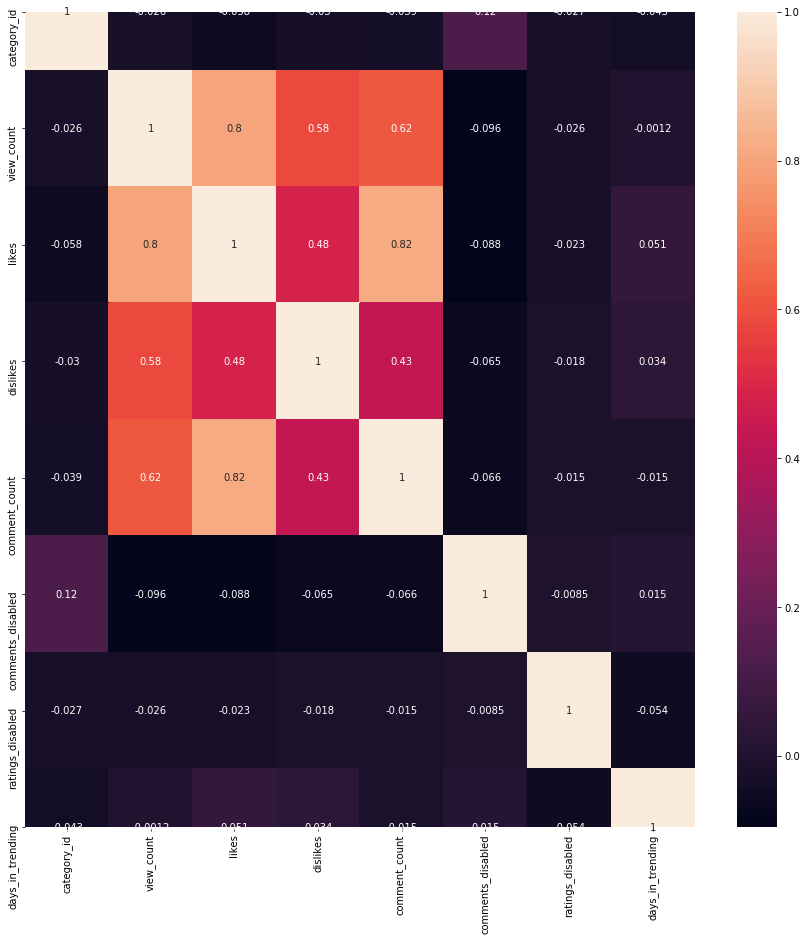

In [231]:
plt.figure(figsize=(15, 15))
sns.heatmap(videos_df.corr(), annot=True)

# Regression

In [190]:
# X: category_id, view_count, likes, dislikes, comment_count
# y: days_in_trending
X = videos_df[['category_id', 'view_count', 'likes', 'dislikes', 'comment_count']]
y = videos_df['days_in_trending']
X

,category_id,view_count,likes,dislikes,comment_count
0,24,2044821,139610,30568,21254
1,17,361939,4073,123,264
2,24,891295,60449,2588,5394
3,24,11118737,555670,7799,19648
4,10,958583,77346,795,3433
...,...,...,...,...,...
615,26,262568,10554,65,672
616,23,474082,47963,713,1670
617,28,637074,25538,484,2666
618,26,722214,32731,406,1655


In [191]:
# preprocessing
# one hot (get dummies) of category_id
category_dummies = pd.get_dummies(X['category_id'])
category_dummies

,1,2,10,15,17,19,20,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,0,0,0,0,0,0,0,0,0,0,0,1,0,0
616,0,0,0,0,0,0,0,0,1,0,0,0,0,0
617,0,0,0,0,0,0,0,0,0,0,0,0,0,1
618,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [192]:
X = X.drop('category_id', axis=1)

In [193]:
# standard scaling of other features
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

y = pd.DataFrame(y, columns=['days_in_trending'])
standard_scaler = StandardScaler()
y = standard_scaler.fit_transform(y)

In [194]:
X_df = pd.DataFrame(X, columns=['view_count', 'likes', 'dislikes', 'comment_count'])

In [195]:
# creating preprocessed dataframe
X = pd.concat([X_df, category_dummies], axis=1)

In [196]:
X

,view_count,likes,dislikes,comment_count,1,2,10,15,17,19,20,22,23,24,25,26,27,28
0,0.187497,0.337078,0.058308,0.345427,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,-0.304999,-0.353915,-0.045750,-0.168716,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,-0.150083,-0.066499,-0.037325,-0.043059,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2.842980,2.458229,-0.019514,0.306089,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-0.130391,0.019645,-0.043453,-0.091093,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,-0.334080,-0.320873,-0.045948,-0.158723,0,0,0,0,0,0,0,0,0,0,0,1,0,0
616,-0.272181,-0.130155,-0.043734,-0.134277,0,0,0,0,0,0,0,0,1,0,0,0,0,0
617,-0.224481,-0.244482,-0.044516,-0.109880,0,0,0,0,0,0,0,0,0,0,0,0,0,1
618,-0.199565,-0.207811,-0.044783,-0.134644,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [197]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=33)
print(y_train.size)
print(y_test.size)

434
186


In [198]:
# support vector regressor
svr = SVR(C=1.0, epsilon=0.2)

In [199]:
# obucavanje
svr.fit(X_train, y_train)

C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [200]:
y_pred = svr.predict(X_test)

In [201]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.01916234136893591

In [202]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.7623751872024039
MSE: 0.8985046729612638
RMSE: 0.9478948638753476


In [203]:
svr.score(X_test, y_test)

-0.01916234136893591

# Linear Regression

In [204]:
# X: category_id, view_count, likes, dislikes, comment_count
# y: days_in_trending
X = videos_df[['view_count', 'likes', 'dislikes', 'comment_count']]
y = videos_df['days_in_trending']
X

,view_count,likes,dislikes,comment_count
0,2044821,139610,30568,21254
1,361939,4073,123,264
2,891295,60449,2588,5394
3,11118737,555670,7799,19648
4,958583,77346,795,3433
...,...,...,...,...
615,262568,10554,65,672
616,474082,47963,713,1670
617,637074,25538,484,2666
618,722214,32731,406,1655


In [205]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [206]:
# standard scaling of other features
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = pd.DataFrame(y_train, columns=['days_in_trending'])
y_test = pd.DataFrame(y_test, columns=['days_in_trending'])

scaler_Y = StandardScaler()
y_train = scaler_Y.fit_transform(y_train)
y_test = scaler_Y.transform(y_test)

In [207]:
regressor = LinearRegression()

In [208]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [209]:
y_pred = regressor.predict(X_test)

Text(0, 0.5, 'Predicted Y')

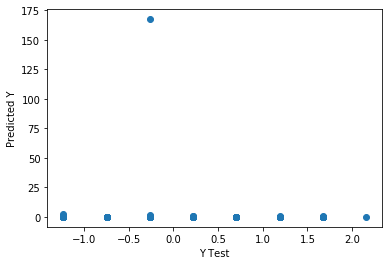

In [210]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [211]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.6786892550170784
MSE: 151.90328568932642
RMSE: 12.32490509859311
